# Goals for This Notebook

The purpose of this notebook is to inspect data before the preprocessing data stage.
- [Import Python Packages]()
- [Import Dataset]()
- [Filter Dataset based on The Relevant Column]()
- [Denormalization Dataset]()
- [Rename Columns]()
- [Checking Data Shape]()
- [Checking Data Types]()
- [Convert the Datetime Column to DateTime Type]()
- [Checking Missing Values]()
- [Checking Duplicate Rows]()
- [Unique Data in Each Categorical Column]()
- [Checking Data Distribution for Numerical Column]()
- [Checking Outliers in Numerical Columns]()
- [Checking Descriptive Statistics for Numerical Columns]()
- [Checking Negative Values in Numerical Columns]()
- [Checking Correlation in Numerical Columns]()

# Import Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

The dataset source: [Waze for Cities](https://drive.google.com/drive/folders/1612sKseH8t3Pc1Mb9fTYfbV2VnbSAvGn?usp=share_link)

In [2]:
df_alert = pd.read_csv(
    "../../data/raw-data/aggregate_alerts_Kota Bandung.zip", compression="zip"
)
df_irreg = pd.read_csv(
    "../../data/raw-data/aggregate_median_irregularities_Kota Bandung.zip",
    compression="zip",
)
df_jams = pd.read_csv(
    "../../data/raw-data/aggregate_median_jams_Kota Bandung_fixed.zip",
    compression="zip",
)


# Filter Dataset based on The Relevant Column

In [3]:
df_jams_filtered = df_jams[
    [
        "street",
        "time",
        "level",
        "median_length",
        "median_delay",
        "median_speed_kmh",
        "total_records",
        "geometry",
    ]
]

df_irreg_filtered = df_irreg[
    [
        "street",
        "time",
        "median_length",
        "median_seconds",
        "median_speed",
        "total_records",
        "geometry",
    ]
]

df_alert_filtered = df_alert[["street", "time", "type", "total_records"]]


# Denormalization Dataset

In [4]:
df_merge = pd.merge(df_jams_filtered, df_irreg_filtered, on=["street", "time"])
df_merge = pd.merge(df_merge, df_alert_filtered, on=["street", "time"])


# Rename Columns

In [5]:
df_merge = df_merge.rename(
    {
        "street": "Street",
        "time": "Datetime",
        "level": "Jam Level",
        "median_length_x": "Jam Length (meters)",
        "median_delay": "Jam Time Spent (seconds)",
        "median_speed_kmh": "Jam Speed (Km/h)",
        "total_records_x": "Total Jam Records",
        "geometry_x": "Jam Geometry",
        "median_length_y": "Irregularities Length (meters)",
        "median_seconds": "Irregularities Time Spent (seconds)",
        "median_speed": "Irregularities Speed (Km/h)",
        "total_records_y": "Total Irregularities Records",
        "geometry_y": "Irregularities Geometry",
        "type": "Alert Type",
        "total_records": "Total Alert Records",
    },
    axis=1,
)


# Checking Data Shape

In [6]:
df_merge.shape


(19809, 15)

# Checking Data Types

In [7]:
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19809 entries, 0 to 19808
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Street                               19801 non-null  object 
 1   Datetime                             19809 non-null  object 
 2   Jam Level                            19809 non-null  int64  
 3   Jam Length (meters)                  19809 non-null  float64
 4   Jam Time Spent (seconds)             19809 non-null  float64
 5   Jam Speed (Km/h)                     19809 non-null  float64
 6   Total Jam Records                    19809 non-null  int64  
 7   Jam Geometry                         19809 non-null  object 
 8   Irregularities Length (meters)       19809 non-null  float64
 9   Irregularities Time Spent (seconds)  19809 non-null  float64
 10  Irregularities Speed (Km/h)          19809 non-null  float64
 11  Total Irregularities Records

# Convert the Datetime column to the Datetime type

In [8]:
df_merge["Datetime"] = pd.to_datetime(
    df_merge["Datetime"], format="%Y-%m-%d %H:%M:%S.%f"
)


# Checking Missing Values

In [9]:
df_merge.isnull().sum()


Street                                 8
Datetime                               0
Jam Level                              0
Jam Length (meters)                    0
Jam Time Spent (seconds)               0
Jam Speed (Km/h)                       0
Total Jam Records                      0
Jam Geometry                           0
Irregularities Length (meters)         0
Irregularities Time Spent (seconds)    0
Irregularities Speed (Km/h)            0
Total Irregularities Records           0
Irregularities Geometry                0
Alert Type                             0
Total Alert Records                    0
dtype: int64

Since there are only 8 rows with missing values out of a total of 19809 rows, I will drop those rows with missing values.

In [10]:
df_merge.dropna(inplace=True)


# Checking Duplicate Rows

In [11]:
if True in df_merge.duplicated().tolist():
    print("There are duplicate rows in the data.")
else:
    print("There are no duplicate rows in the data")


There are no duplicate rows in the data


# Unique Data in Each Categorical Column

In [12]:
categorical_columns = ["Street", "Jam Level", "Alert Type"]
# Loop through each column and print the unique values
for col in categorical_columns:
    print("Unique values for column '{}': {}\n".format(col, df_merge[col].unique()))


Unique values for column 'Street': ['Jenderal AH Nasution' 'N11 Soekarno-Hatta' 'Terusan Buah Batu'
 'Tol Padaleunyi' 'Sederhana' 'Dr Setiabudi' 'Ir Haji Juanda'
 'Jalan Rumah Sakit' 'Terusan Pasir Koja' 'Gerbang Tol Pasir Koja' 'Kopo'
 'Pasteur' 'Sersan Bajuri' 'Jenderal Ibrahim Adjie'
 'Prof Dr Surya Sumantri' 'RA Wiranatakusumah' 'Ciumbuleuit'
 'Jalan Raya Lembang' 'Soekarno-Hatta (Jalur Lambat)' 'Gatot Subroto'
 'Prof Mochtar Kusumaatmadja' 'Buah Batu' 'Cibaduyut Raya' 'Cihampelas'
 'Dr Djundjunan' 'Jenderal Ahmad Yani' 'Mustang' 'Logam' 'Surapati'
 'Mohammad Toha' 'Tamansari' 'LLRE Martadinata' 'Diponegoro'
 'Pelajar Pejuang 45' 'Cijerah Raya' 'Holis' 'Cibolerang' 'Ciwastra'
 'Jalan Gunung Batu' 'Sukaraja' 'Caringin' 'Kapten Tata Natanegara'
 'KH Wahid Hasyim' 'Lodaya' 'Melong Raya' 'Margacinta'
 'N11 Jenderal Sudirman' 'Prof Dr Ir Sutami' 'R A A Martanegara'
 'PHH Mustofa' 'WR Supratman' 'Ciparay' 'Terusan Kiaracondong' 'Cijagra'
 'N11 Jenderal Haji Amir Machmud' 'Cikutra Barat' 

There is no strange or inconsistent data in the categorical column, but I will make the data in the Alert Type column to Lowercase.

In [13]:
# Make it lowercase
df_merge['Alert Type'] = df_merge['Alert Type'].str.title()

# Checking Data Distribution for Numerical Column

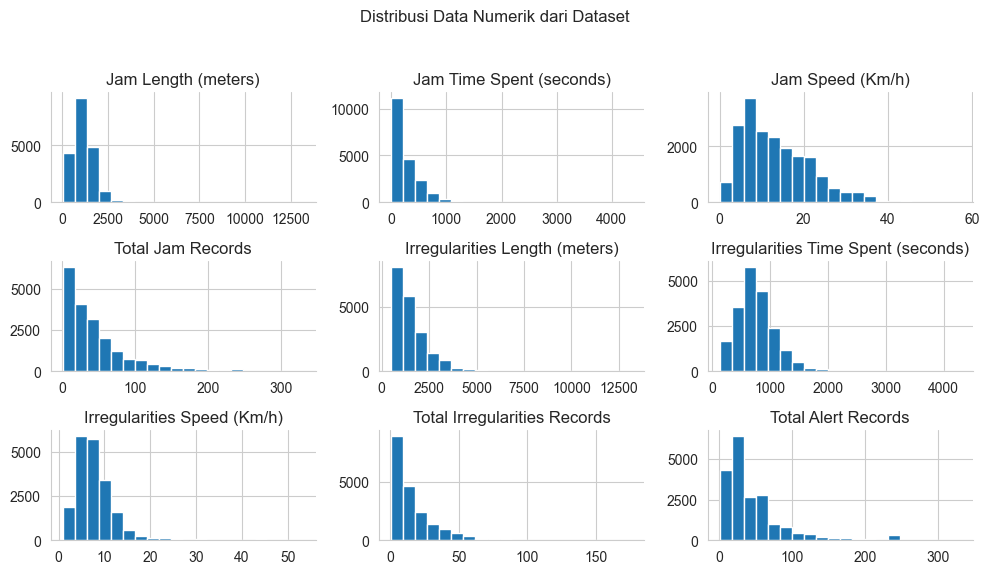

In [29]:
numerical_columns = [
    "Jam Length (meters)",
    "Jam Time Spent (seconds)",
    "Jam Speed (Km/h)",
    "Total Jam Records",
    "Irregularities Length (meters)",
    "Irregularities Time Spent (seconds)",
    "Irregularities Speed (Km/h)",
    "Total Irregularities Records",
    "Total Alert Records",
]

# facet & geometric object
ax = df_merge[numerical_columns].hist(figsize=(10, 6), bins=20)

# aesthetics
sns.set_style("ticks")
sns.despine()
plt.suptitle("Distribusi Data Numerik dari Dataset")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


It appears that most of the numerical data on the dataset has a skewed distribution.

# Checking Outliers in Numerical Columns

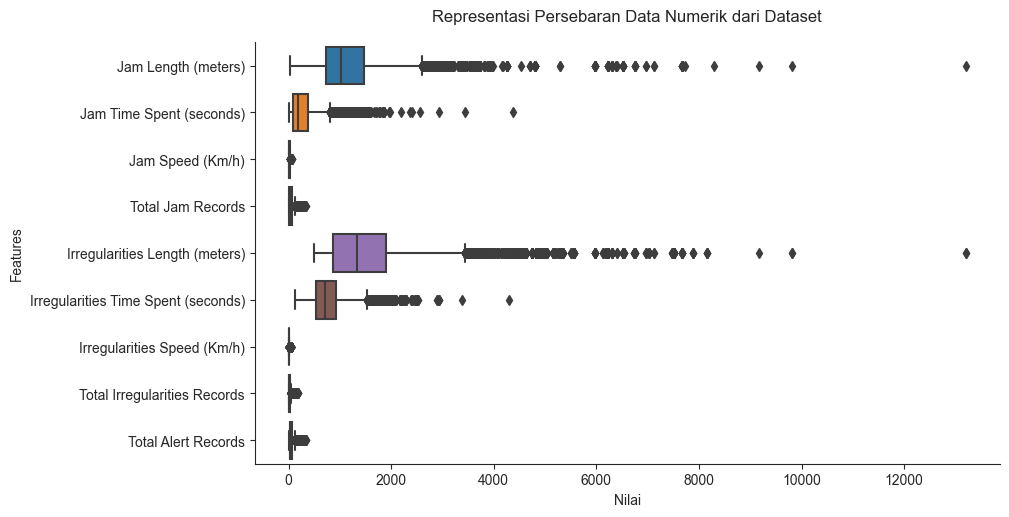

In [15]:
# facet
plt.figure(figsize=(10, 5))

# geometric object
sns.boxplot(data=df_merge[numerical_columns], orient="h")

# aesthetics
sns.set_style("whitegrid")
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Representasi Persebaran Data Numerik dari Dataset", pad=15)
plt.ylabel("Features")
plt.xlabel("Nilai")
plt.xticks(rotation=360)
plt.show()


It appears that most of the dataset has outliers, but it appears that the outliers pattern in the Jams and Irregularities columns is almost the same. So there is a possibility that this outliers are not an unusual error or condition, so I will not delete the outliers because the outliers can be aware of the conditions that really exist in the dataset

# Checking Descriptive Statistics for Numerical Columns

In [16]:
df_merge[numerical_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
Jam Length (meters),19801.0,1145.147291,672.797284,24.00,728.00,1032.000000,1476.00,13201.00
Jam Time Spent (seconds),19801.0,273.201202,250.995594,-1.00,95.00,179.000000,378.00,4368.50
Jam Speed (Km/h),19801.0,13.376370,8.367126,0.00,6.69,11.639999,18.67,57.28
Total Jam Records,19801.0,45.598000,46.864158,1.00,13.00,31.000000,60.00,331.00
Irregularities Length (meters),19801.0,1546.701101,943.741351,500.00,874.00,1339.000000,1900.00,13201.00
Irregularities Time Spent (seconds),19801.0,759.225191,330.727332,132.00,537.50,720.000000,934.50,4295.50
Irregularities Speed (Km/h),19801.0,8.001935,4.923337,0.88,5.04,7.060000,9.73,53.49
Total Irregularities Records,19801.0,16.485228,17.235238,1.00,4.00,11.000000,23.00,176.00
Total Alert Records,19801.0,46.739660,44.933235,1.00,20.00,31.000000,60.00,331.00


# Checking Negative Values in Numerical Columns

In [17]:
negative_values = []
for idx, val in enumerate(df_merge["Jam Time Spent (seconds)"].tolist()):
    if val < 0:
        negative_values.append(val)
print("The size of negative values is {}".format(len(negative_values)))


The size of negative values is 329


There are many negative values in the Jam Time Spent (seconds) column. This negative value means that traffic in the area does not experience delays or even faster than normal speed. In the context of data delay of hours, negative values indicate the remaining time, which is the difference between the time that should be needed to pass the road with the actual time needed. So that this negative value is not an error or an unusual thing, so I do not delete this negative value.

# Checking Correlation in Numerical Columns

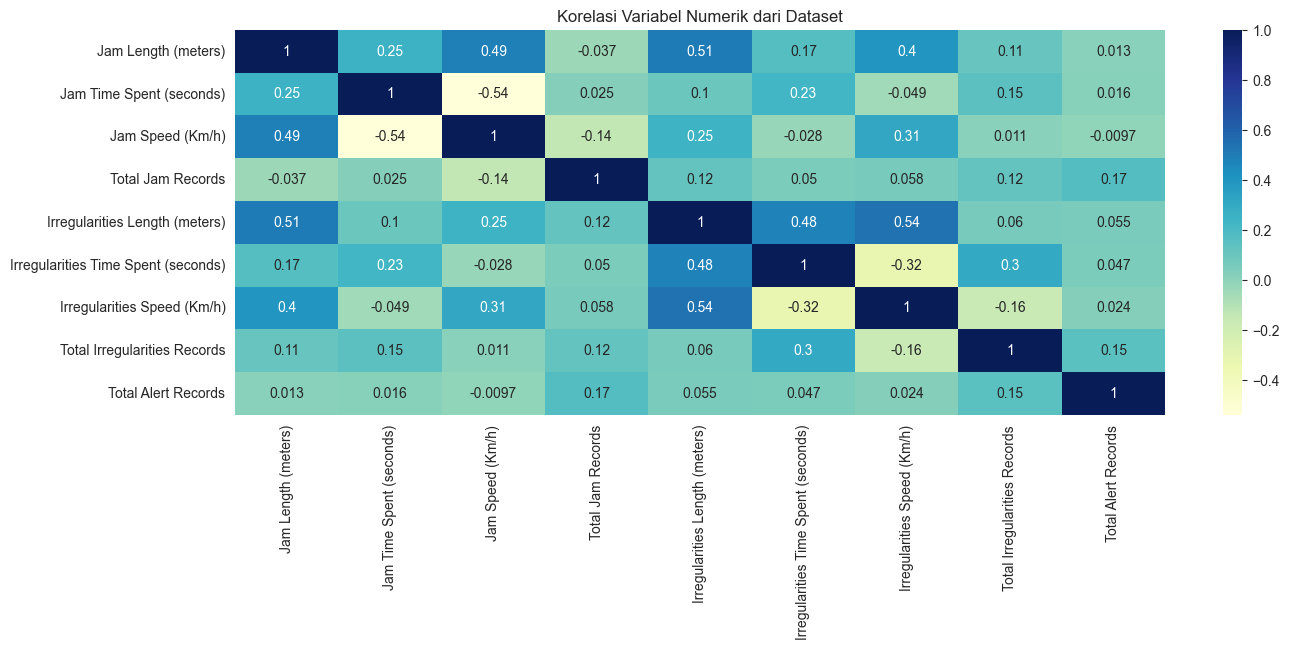

In [18]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_merge[numerical_columns].corr(), annot=True, cmap="YlGnBu")
plt.title("Korelasi Variabel Numerik dari Dataset")
plt.show()


It appears that the time, distance, and speed column both in Jams and Irregularities data is a moderate positive correlation.